<a href="https://colab.research.google.com/github/OhMinSuk/KBO-Data-Analysis/blob/main/%EC%A0%84%EA%B3%B5%EC%8B%AC%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KBO 일자별 순위 데이터 크롤링(22~23년도 시즌)**

In [ ]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import pandas as pd
import time
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("--single-process")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome()

# 결과를 저장할 빈 DataFrame 생성
df_all = pd.DataFrame()

try:
    # 웹페이지 열기
    driver.get('https://www.koreabaseball.com/Record/TeamRank/TeamRankDaily.aspx')

    while True:
        # 현재 설정된 날짜 가져오기
        search_date_title = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "cphContents_cphContents_cphContents_lblSearchDateTitle"))
        ).text

        # 종료 조건 확인
        if search_date_title == "2021.10.30": #21년도 마지막 경기 일자
            break

        # 데이터 추출
        table = driver.find_element(By.CLASS_NAME, "tData")
        rows = table.find_elements(By.TAG_NAME, "tr")[1:]  # 첫 번째 행은 테이블 헤더

        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            rank = cols[0].text.strip()  # 순위
            team = cols[1].text.strip()  # 팀 이름
            win_rate = cols[6].text.strip()  # 승률
            streak = cols[9].text.strip()   #연속

            df_all = pd.concat([df_all, pd.DataFrame({
                "rank": [rank],
                "team": [team],
                "win_rate": [win_rate],
                "streak": [streak],
                "date": [search_date_title]
            })], ignore_index=True)

        # 이전 날짜로 이동
        prev_button = driver.find_element(By.CLASS_NAME, "date_prev")
        prev_button.click()

        # 페이지 로드 대기
        time.sleep(1)

finally:
    driver.quit()

print(df_all)
df_all.to_csv('/') #파일 저장 경로 지정

ModuleNotFoundError: No module named 'selenium'

**크롤링 데이터 팀명 전처리**

In [ ]:
df_data = pd.read_csv('/content/24KBO일자별데이터.csv')

df_data['team'] = df_data['team'].replace('KIA', '기아타이거즈')
df_data['team'] = df_data['team'].replace('두산', '두산베어스')
df_data['team'] = df_data['team'].replace('롯데', '롯데자이언츠')
df_data['team'] = df_data['team'].replace('한화', '한화이글스')
df_data['team'] = df_data['team'].replace('키움', '키움히어로즈')
df_data['team'] = df_data['team'].replace('삼성', '삼성라이온즈')
df_data['team'] = df_data['team'].replace('LG', 'LG트윈스')
df_data['team'] = df_data['team'].replace('SSG', 'SSG랜더스')
df_data['team'] = df_data['team'].replace('NC', 'NC다이노스')
df_data['team'] = df_data['team'].replace('KT', 'KT위즈')

df_data= df_data.drop(df_data.columns[0],axis=1)
df_data.head()

,rank,team,win_rate,streak,date
0,1,기아타이거즈,0.613,2승,2024.10.01
1,2,삼성라이온즈,0.549,1패,2024.10.01
2,3,LG트윈스,0.535,2승,2024.10.01
3,4,두산베어스,0.521,4승,2024.10.01
4,5,KT위즈,0.507,3승,2024.10.01


#**CSV 병합(일자별 KBO구단 검색량 데이터)**

In [ ]:
# https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=3e6434a0-1e55-11eb-a4e6-a9a03a61580b

import pandas as pd
import glob

# CSV 파일들이 있는 폴더 경로
path = './'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.to_csv("/", index=False)# 저장할 경로 지정


#**데이터 전처리(22,23년도)**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/24년도.csv')
#df = pd.read_csv('/content/23년도.csv')

print(df.head())

   SEQ_NO  ALL_KWRD_RANK_CO SRCHWRD_NM UPPER_CTGRY_NM LWPRT_CTGRY_NM LEA_NM  \
0       0                 1      한화이글스          프로스포츠         국내프로야구    KBO   
1       1                 2     기아타이거즈          프로스포츠         국내프로야구    KBO   
2       2                 3     삼성라이온즈          프로스포츠         국내프로야구    KBO   
3       3                 4     롯데자이언츠          프로스포츠         국내프로야구    KBO   
4       4                 5      두산베어스          프로스포츠         국내프로야구    KBO   

   MOBILE_SCCNT_VALUE  PC_SCCNT_VALUE  SCCNT_SM_VALUE  SCCNT_DE  
0               82333            8080           90413  20240323  
1               48730            2828           51558  20240323  
2               39261            3118           42379  20240323  
3               38541            3721           42262  20240323  
4               31451            4068           35519  20240323  


- MLB 데이터 제거

In [ ]:
df = df[df.LEA_NM != 'MLB']

- 불필요한 Attribute 제거 (SEQ_NO,ALL_KWRD_RANK_CO,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,LEA_NM)</br>
- 날짜 포맷 변경(%Y.%m.%d)

In [ ]:
df = df.drop(df.columns[[0,1,3,4,5]],axis=1)

df['SCCNT_DE'] = pd.to_datetime(df['SCCNT_DE'], format='%Y%m%d')
df['SCCNT_DE'] = df['SCCNT_DE'].dt.strftime('%Y.%m.%d')


df= df.rename(columns={'SRCHWRD_NM': 'team','MOBILE_SCCNT_VALUE': 'mobile_value','PC_SCCNT_VALUE': 'pc_value','SCCNT_SM_VALUE': 'sum_value','SCCNT_DE': 'date'})

df['team'] = df['team'].replace('KIA', '기아타이거즈')
df['team'] = df['team'].replace('두산', '두산베어스')
df['team'] = df['team'].replace('롯데', '롯데자이언츠')
df['team'] = df['team'].replace('한화', '한화이글스')
df['team'] = df['team'].replace('키움', '키움히어로즈')
df['team'] = df['team'].replace('삼성', '삼성라이온즈')
df['team'] = df['team'].replace('LG', 'LG트윈스')
df['team'] = df['team'].replace('SSG', 'SSG랜더스')
df['team'] = df['team'].replace('NC', 'NC다이노스')
df['team'] = df['team'].replace('KT', 'KT위즈')

# 날짜순으로 내림차순 정렬하기
df_sorted = df.sort_values(by='date', ascending=False)
df_sorted.to_csv('24년최종.csv',index=False)

**22년, 23년 데이터 병합 및 컬럼명 변경**

In [ ]:
df1 = pd.read_csv('/content/23년최종.csv')
df2 = pd.read_csv('/content/22년최종.csv')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2])

#컬럼명 변경
df_final = merged_df.rename(columns={'SRCHWRD_NM': 'team', 'MOBILE_SCCNT_VALUE': 'mobile_value','PC_SCCNT_VALUE': 'pc_value','SCCNT_SM_VALUE': 'sum_value','SCCNT_DE': 'date'})

# 새로운 CSV 파일로 저장
df_final.to_csv('22-23검색량데이터.csv', index=False)


In [ ]:
final_df = pd.merge(df_data, df_sorted, on=['team', 'date'])

final_df.to_csv('24데이터최종.csv', index=False)

# 관중수 데이터 전처리

In [ ]:
import pandas as pd
df = pd.read_csv('/content/24관중.csv',encoding='cp949')


df_data = df.rename(columns= {'날짜' : 'date', '홈' : 'team', '요일':'day', '구장':'stadium', '관중수':'attendance','방문':'away'})

df_data['team'] = df_data['team'].replace('KIA', '기아타이거즈')
df_data['team'] = df_data['team'].replace('두산', '두산베어스')
df_data['team'] = df_data['team'].replace('롯데', '롯데자이언츠')
df_data['team'] = df_data['team'].replace('한화', '한화이글스')
df_data['team'] = df_data['team'].replace('키움', '키움히어로즈')
df_data['team'] = df_data['team'].replace('삼성', '삼성라이온즈')
df_data['team'] = df_data['team'].replace('LG', 'LG트윈스')
df_data['team'] = df_data['team'].replace('SSG', 'SSG랜더스')
df_data['team'] = df_data['team'].replace('NC', 'NC다이노스')
df_data['team'] = df_data['team'].replace('KT', 'KT위즈')

df_data['away'] = df_data['away'].replace('KIA', '기아타이거즈')
df_data['away'] = df_data['away'].replace('두산', '두산베어스')
df_data['away'] = df_data['away'].replace('롯데', '롯데자이언츠')
df_data['away'] = df_data['away'].replace('한화', '한화이글스')
df_data['away'] = df_data['away'].replace('키움', '키움히어로즈')
df_data['away'] = df_data['away'].replace('삼성', '삼성라이온즈')
df_data['away'] = df_data['away'].replace('LG', 'LG트윈스')
df_data['away'] = df_data['away'].replace('SSG', 'SSG랜더스')
df_data['away'] = df_data['away'].replace('NC', 'NC다이노스')
df_data['away'] = df_data['away'].replace('KT', 'KT위즈')

df_data.to_csv('24관중데이터.csv',index=False)



#관중수 및 홈 어웨이 구장 데이터 추가

In [ ]:
import pandas as pd

# CSV 파일 로드
df1 = pd.read_csv('24관중데이터.csv')
df2 = pd.read_csv('24데이터최종.csv')

df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d').dt.strftime('%Y.%m.%d')
df2['date'] = pd.to_datetime(df2['date'], format='%Y.%m.%d').dt.strftime('%Y.%m.%d')

df_home = df1[['date', 'day', 'team', 'stadium', 'attendance']].copy()
df_home['home_or_away'] = 'home'

df_away = df1[['date', 'day', 'away', 'stadium', 'attendance']].rename(columns={'away': 'team'})
df_away['home_or_away'] = 'away'

df_combined = pd.concat([df_home, df_away], ignore_index=True)

# df2와 합치기
df2_merged = pd.merge(df2, df_combined, on=['date', 'team'], how='left')

df_final1 = df2_merged[['date','day','rank','team','win_rate','streak','mobile_value','pc_value','sum_value','stadium','home_or_away','attendance']]

df_final1.to_csv('24KBO데이터.csv', index=False)

### 홈 어웨이 (70:30) 비율로 계산하여 새로운 attendance열 추가 및 구장별 수용 관중 수 비율 추가

In [ ]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('/content/24KBO데이터.csv')

# 'attendance' 열의 쉼표 제거 및 숫자형으로 변환
df['attendance'] = df['attendance'].replace(',', '', regex=True)
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

# 새로운 열 'new_attendance' 추가 및 계산
df['new_attendance'] = np.where(df['home_or_away'] == 'home', df['attendance'] * 0.7, df['attendance'] * 0.3)

# new_attendance 열을 정수형으로 변환하고 반올림
df['new_attendance'] = df['new_attendance'].round().astype('Int64')

# 'away'인 경우 'new_attendance' 값을 NaN으로 변경
df.loc[df['home_or_away'] == 'away', 'new_attendance'] = np.nan

# 구장별 수용 인원
stadium_capacity = {
    '문학': 23000, '광주': 20500, '잠실': 25000, '창원': 17800,
    '대전': 13000, '대구': 24000, '사직': 23000, '수원': 19000,
    '고척': 16000, '울산': 12000, '포항': 12000
}

# attendance 비율 계산 함수
def calculate_attendance_ratio(row):
    if pd.notnull(row['attendance']) and row['stadium'] in stadium_capacity:
        return min(row['attendance'] / stadium_capacity[row['stadium']], 1) * 100
    return None

# attendance 비율 계산 및 포맷팅
df['attendance_ratio'] = df.apply(calculate_attendance_ratio, axis=1)
df['attendance_ratio'] = df['attendance_ratio'].apply(lambda x: round(x, 2) if pd.notnull(x) else None)

# rank 열을 범주형으로 변환
df['rank'] = df['rank'].astype('category')

# 결과 저장
df.to_csv('24KBO데이터최종.csv', index=False)

# 결과 확인
print(df[['home_or_away', 'attendance', 'new_attendance', 'attendance_ratio']].head(10))

  home_or_away  attendance  new_attendance  attendance_ratio
0         home     20500.0           14350             100.0
1          NaN         NaN            <NA>               NaN
2          NaN         NaN            <NA>               NaN
3          NaN         NaN            <NA>               NaN
4          NaN         NaN            <NA>               NaN
5         home     23000.0           16100             100.0
6          NaN         NaN            <NA>               NaN
7          NaN         NaN            <NA>               NaN
8         away     20500.0            <NA>             100.0
9         away     23000.0            <NA>             100.0


In [ ]:
import pandas as pd


# CSV 파일 읽기
df_1 = pd.read_csv('/content/kbo최종.csv')
df_2 = pd.read_csv('/content/24KBO데이터최종.csv')

df_1= df_1.drop(df_1.columns[[6,7,12,13]],axis=1)
df_2= df_2.drop(df_2.columns[[6,7,12]],axis=1)

final_df = pd.concat([df_1, df_2])

final_df['team'] = final_df['team'].replace('기아타이거즈','KIA')
final_df['team'] = final_df['team'].replace('두산베어스','두산')
final_df['team'] = final_df['team'].replace('롯데자이언츠','롯데')
final_df['team'] = final_df['team'].replace('한화이글스','한화')
final_df['team'] = final_df['team'].replace('키움히어로즈','키움')
final_df['team'] = final_df['team'].replace('삼성라이온즈','삼성')
final_df['team'] = final_df['team'].replace('LG트윈스','LG')
final_df['team'] = final_df['team'].replace('SSG랜더스','SSG')
final_df['team'] = final_df['team'].replace('NC다이노스','NC')
final_df['team'] = final_df['team'].replace('KT위즈','KT')

final_df = final_df.sort_values(by='date', ascending=False)
final_df = final_df.rename(columns= {'sum_value' : 'search_value'})
final_df.loc[final_df['home_or_away'] == 'away', ['attendance', 'attendance_ratio']] = None

final_df['attendance_ratio'] = final_df['attendance_ratio'].fillna(0)
final_df['attendance_ratio'] = np.round(final_df['attendance_ratio']).astype(int)
final_df['attendance_ratio'] = final_df['attendance_ratio'].replace(0, np.nan)

final_df.to_csv('24KBO데이터최종종.csv', index=False)

수치형

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



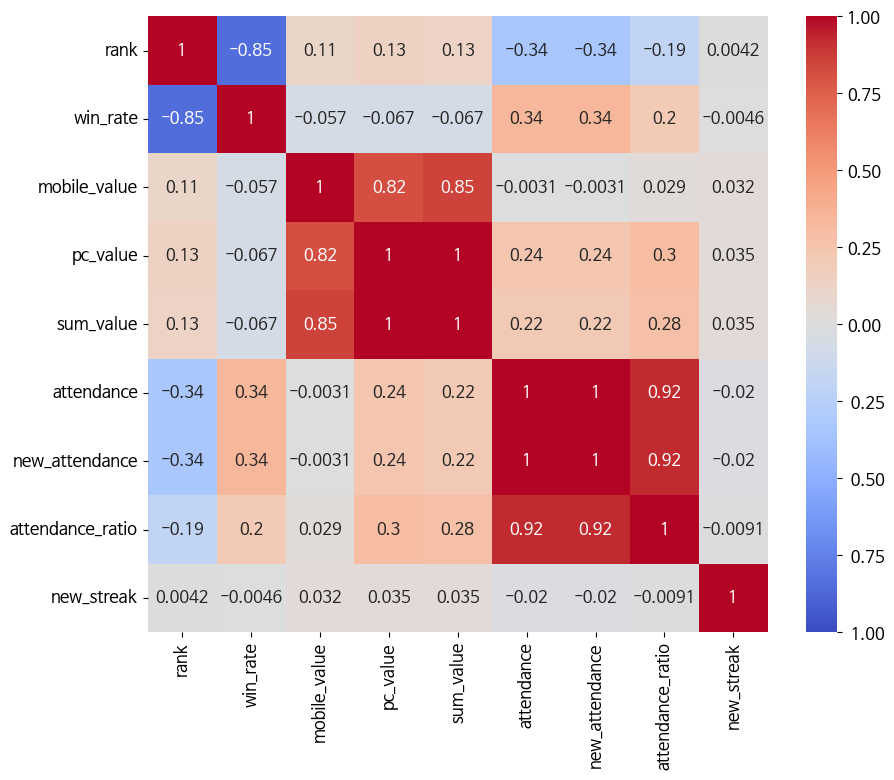

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# 승리와 패배를 숫자로 변환하는 함수 정의 (음수 없이)
def convert_streak_absolute(streak):
    return int(''.join(filter(str.isdigit, streak)))

# new_streak 열 추가
df['new_streak'] = df['streak'].apply(convert_streak_absolute)

# 문자열 데이터를 포함하는 열 제거 및 new_streak 열 추가
df_numeric = df.select_dtypes(include=[float, int]).copy()
df_numeric['new_streak'] = df['new_streak']

# NULL 값을 포함하는 행 제거
df_numeric = df_numeric.dropna()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# **팀별 검색량 분석**

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터.csv',encoding='cp949')

df_grouped = df.groupby('team', as_index=False)['pc_value'].sum()

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_grouped, x='pc_value', y='team',
             title='팀별 PC 검색량',
             labels={'pc_value': '검색량', 'team': '팀'},
             text='pc_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

<ipython-input-41-e6134a1cabdf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=attendance_sum.index, y=attendance_sum.values, palette='rainbow')


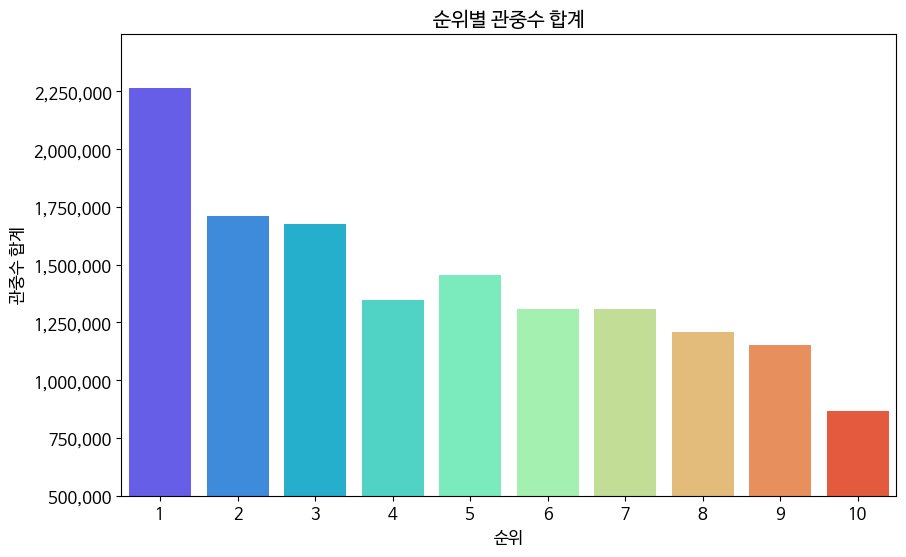

In [ ]:
data = pd.read_csv('/content/22-23KBO데이터최종종.csv')

data = data[data['attendance'].notnull()]

# 순위별 관중수 합계 계산
attendance_sum = data.groupby('rank')['attendance'].sum()

# 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=attendance_sum.index, y=attendance_sum.values, palette='rainbow')

# y축 값 범위 설정
plt.ylim(500000, 2500000)

# y축 값 형식 지정
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# y축 틱 설정
y_ticks = np.arange(500000, 2300000, 250000)
plt.gca().set_yticks(y_ticks)

# x축 범위 설정
plt.xticks(np.arange(0, 10))

plt.xlabel('순위')
plt.ylabel('관중수 합계')
plt.title('순위별 관중수 합계')
plt.show()

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터.csv',encoding='cp949')

df_grouped = df.groupby('team', as_index=False)['mobile_value'].sum()

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_grouped, x='mobile_value', y='team',
             title='팀별 모바일 검색량',
             labels={'mobile_value': '검색량', 'team': '팀'},
             text='mobile_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

In [ ]:
df_grouped = df.groupby('team', as_index=False)['sum_value'].sum()
df_sorted = df_grouped.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프 생성
fig = px.bar(df_sorted, x='sum_value', y='team', orientation='h',
             title='팀별 검색량 합계',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시

# 막대 위에 마우스를 올렸을 때 보여줄 정보 설정
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프 보여주기
fig.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df_2022 = df[df['date'].dt.year == 2022]

df_grouped_2022 = df_2022.groupby('team', as_index=False)['sum_value'].sum()
df_sorted_2022 = df_grouped_2022.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프를 생성합니다.
fig = px.bar(df_sorted_2022, x='sum_value', y='team', orientation='h',
             title='2022년 팀별 총 검색량',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시합니다.

# 막대 위의 값 표시 설정을 조정합니다.
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프를 표시합니다.
fig.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df_2023 = df[df['date'].dt.year == 2023]

df_grouped_2023 = df_2023.groupby('team', as_index=False)['sum_value'].sum()
df_sorted_2023 = df_grouped_2023.sort_values(by='sum_value', ascending=True)

# Plotly를 사용하여 수평 막대 그래프를 생성합니다.
fig = px.bar(df_sorted_2023, x='sum_value', y='team', orientation='h',
             title='2023년 팀별 총 검색량',
             labels={'sum_value': '검색량', 'team': '팀'},
             text='sum_value') # 막대 위에 값을 표시합니다.

# 막대 위의 값 표시 설정을 조정합니다.
fig.update_traces(texttemplate='%{text}', textposition='inside')

# 그래프를 표시합니다.
fig.show()

<ipython-input-14-3bcdcce1ebea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='rank', y='sum_value', data=df_grouped, palette='husl')


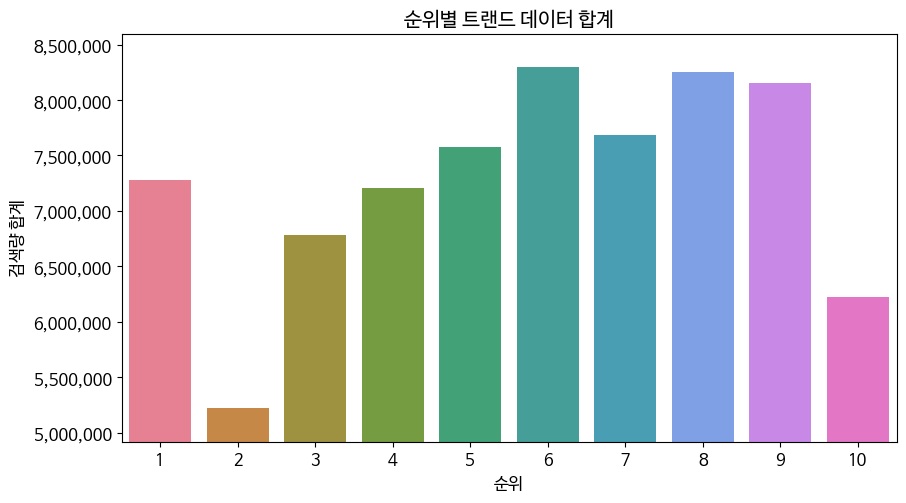

In [ ]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
df = pd.read_csv('/content/22-23KBO데이터최종종.csv')

# 데이터 프레임 생성
df_grouped = df.groupby('rank', as_index=False)['sum_value'].sum()

# Seaborn을 사용하여 수직 막대 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
barplot = sns.barplot(x='rank', y='sum_value', data=df_grouped, palette='husl')

# 레이블과 타이틀 설정
plt.xlabel('순위')
plt.ylabel('검색량 합계')
plt.title('순위별 트랜드 데이터 합계')

# y축 범위 설정
plt.ylim(df_grouped['sum_value'].min() - 300000, df_grouped['sum_value'].max() + 300000)

# y축 값 형식 지정
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# 그래프 간격 조정
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# NaN 값 드랍
df = df.dropna(subset=['attendance'])

# 데이터 타입을 정수로 변환
df['attendance'] = df['attendance'].astype(int)

# 팀별로 그룹화하고 관중 수 합계 계산
df_grouped = df.groupby('team', as_index=False)['attendance'].sum()

# Create a horizontal bar graph using Plotly
fig = px.bar(df_grouped, x='team', y='attendance',
             title='22-23 팀별 누적 관중수',
             labels={'attendance': '관중수', 'team': '팀'},
             text='attendance') # Display values on top of the bars

# Set information to display when hovering over the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')


new_attendance를 이용한 그래프

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# NaN 값 드랍
df = df.dropna(subset=['new_attendance'])

# 데이터 타입을 정수로 변환
df['new_attendance'] = df['new_attendance'].astype(int)

# 팀별로 그룹화하고 관중 수 합계 계산
df_grouped = df.groupby('team', as_index=False)['new_attendance'].sum()

# Create a horizontal bar graph using Plotly
fig = px.bar(df_grouped, x='team', y='new_attendance',
             title='NEW 팀별 관중수',
             labels={'new_attendance': '관중수', 'team': '팀'},
             text='new_attendance') # Display values on top of the bars

# Set information to display when hovering over the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

<ipython-input-42-a6484a13414e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



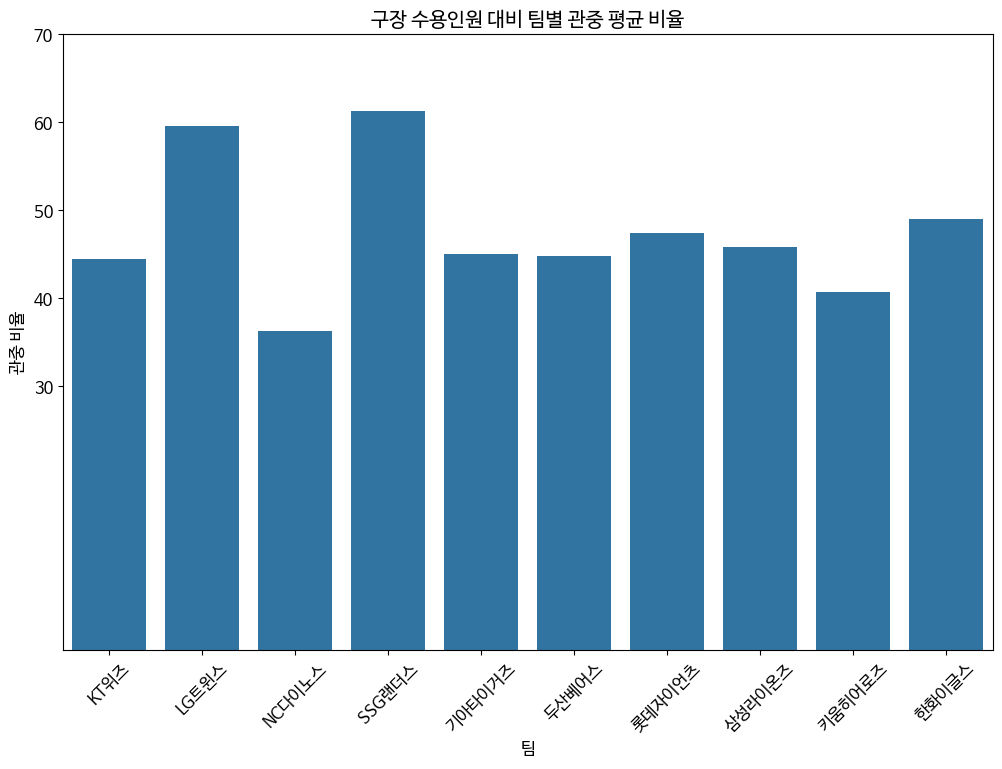

In [ ]:
team_avg_ratio = df.groupby('team')['attendance_ratio'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 팀별 관중 평균 비율')
plt.xticks(rotation=45)

plt.yticks(np.arange(30, 80, 10))  # y축 틱 간격 설정

plt.show()

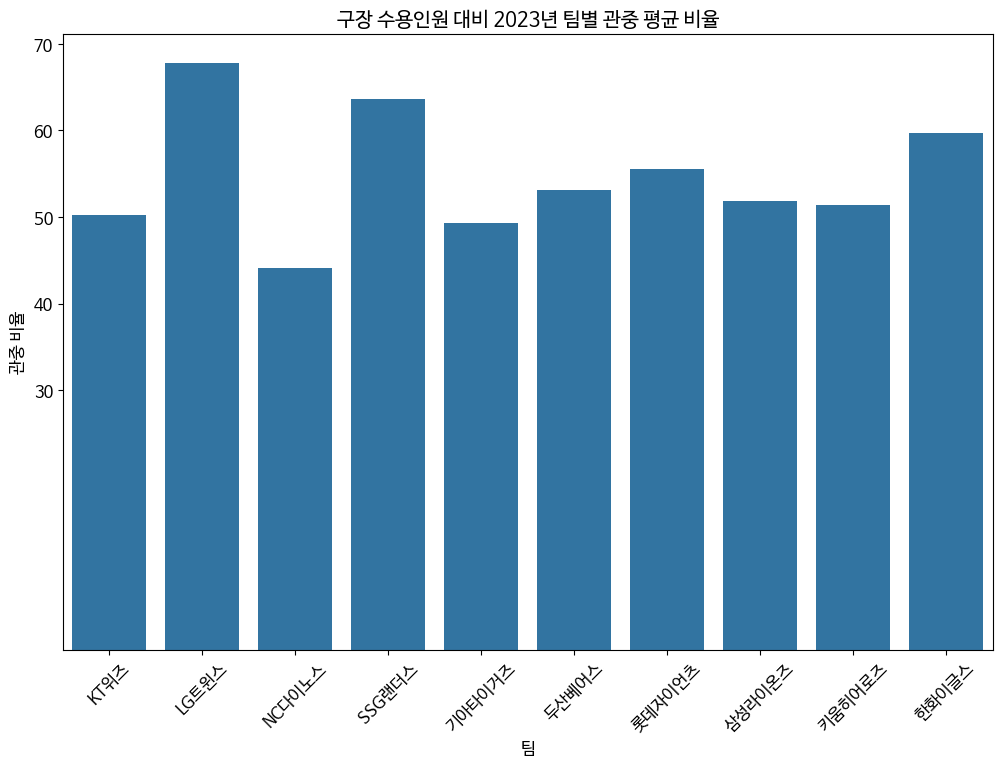

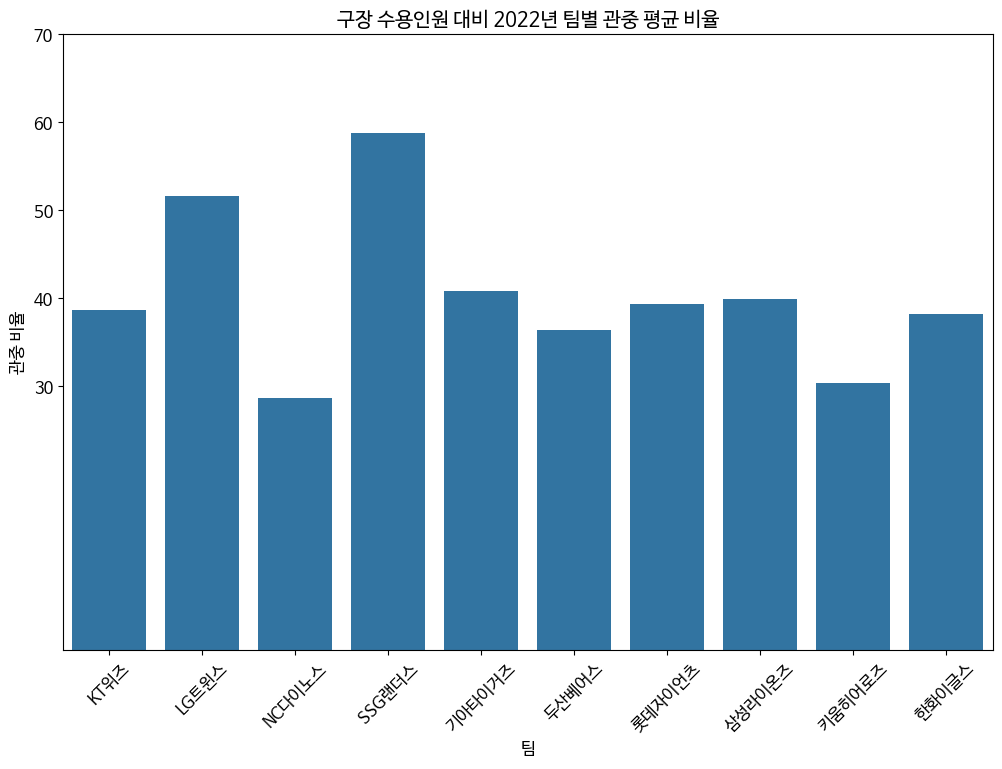

In [ ]:
# 년도 열 추가
df['year'] = pd.to_datetime(df['date']).dt.year

# 2023년 데이터만 추출
df_2023 = df[df['year'] == 2023]

# 2022년 데이터만 추출
df_2022 = df[df['year'] == 2022]

# 2023년 팀별 평균 관중 비율 계산
team_avg_ratio_2023 = df_2023.groupby('team')['attendance_ratio'].mean().reset_index()

# 2022년 팀별 평균 관중 비율 계산
team_avg_ratio_2022 = df_2022.groupby('team')['attendance_ratio'].mean().reset_index()

# 2023년 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio_2023, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 2023년 팀별 관중 평균 비율')
plt.xticks(rotation=45)
plt.yticks(np.arange(30, 80, 10))
plt.show()

# 2022년 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=team_avg_ratio_2022, x='team', y='attendance_ratio')
plt.xlabel('팀')
plt.ylabel('관중 비율')
plt.title('구장 수용인원 대비 2022년 팀별 관중 평균 비율')
plt.xticks(rotation=45)
plt.yticks(np.arange(30, 80, 10))
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# 데이터 로드
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['attendance'])
df['attendance'] = df['attendance'].astype(int)

# 'date' 컬럼을 datetime 타입으로 변환
df['date'] = pd.to_datetime(df['date'])

# 연도 컬럼 추가
df['year'] = df['date'].dt.year

# 2022년도와 2023년도 데이터 필터링
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]

# 2022년도 데이터에 대해 팀별 관중 수 합계 계산 및 시각화
df_grouped_2022 = df_2022.groupby('team', as_index=False)['attendance'].sum()
fig_2022 = px.bar(df_grouped_2022, x='team', y='attendance',
                  title='2022년 팀별 관중수',
                  labels={'attendance': '관중수', 'team': '팀'},
                  text='attendance')
fig_2022.update_traces(texttemplate='%{text}', textposition='inside')
fig_2022.show()

# 2023년도 데이터에 대해 팀별 관중 수 합계 계산 및 시각화
df_grouped_2023 = df_2023.groupby('team', as_index=False)['attendance'].sum()
fig_2023 = px.bar(df_grouped_2023, x='team', y='attendance',
                  title='2023년 팀별 관중수',
                  labels={'attendance': '관중수', 'team': '팀'},
                  text='attendance')
fig_2023.update_traces(texttemplate='%{text}', textposition='inside')
fig_2023.show()


   stadium    attendance
0       고척   6510.430556
1       광주   9212.340278
2       대구  10888.570370
3       대전   6364.684932
4       문학  14072.278912
5       사직  10734.064286
6       수원   8447.541096
7       울산   7058.750000
8       잠실  13021.652921
9       창원   6441.365517
10      포항   6182.666667


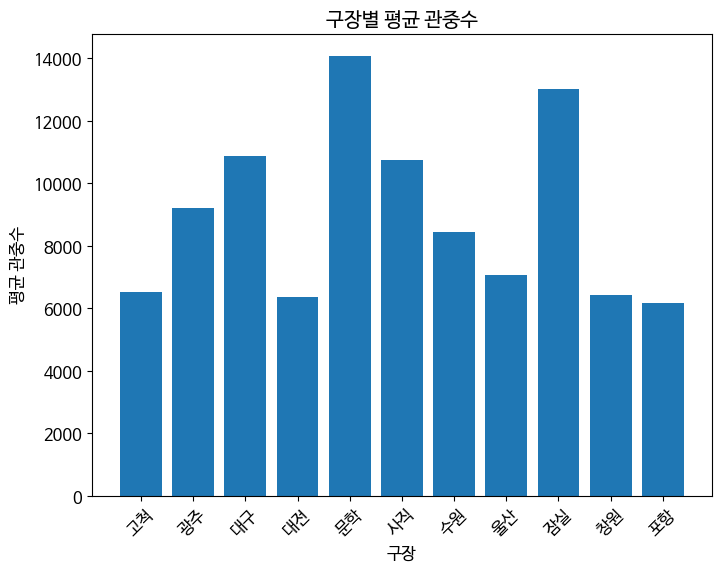

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터최종.csv')

# 결측치 제거
data = data.dropna(subset=['stadium', 'attendance'])

# 구장별 평균 관중수 계산
stadium_mean = data.groupby('stadium')['attendance'].mean().reset_index()
print(stadium_mean)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(stadium_mean['stadium'], stadium_mean['attendance'])
plt.xlabel('구장')
plt.ylabel('평균 관중수')
plt.title('구장별 평균 관중수')
plt.xticks(rotation=45)
plt.show()

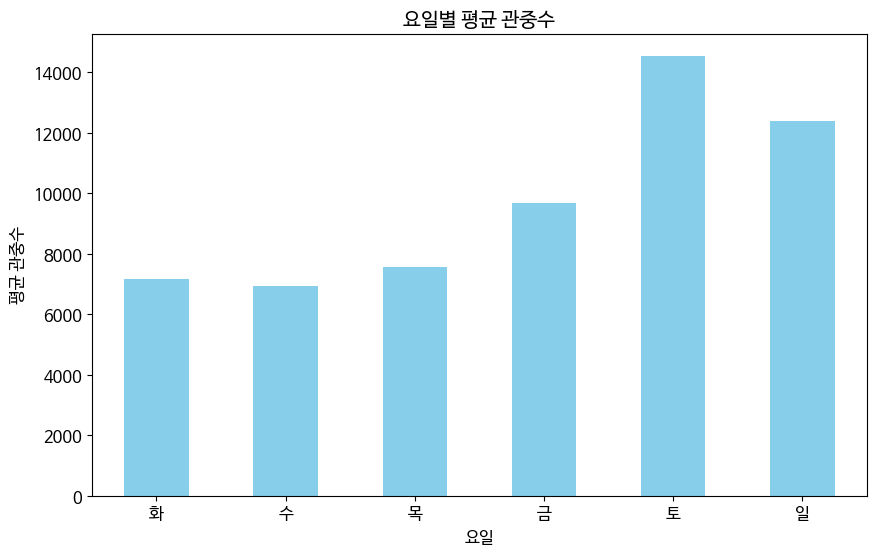

In [ ]:
# 결측값 제거
df_filtered = df.dropna(subset=['attendance', 'day'])
df_filtered = df_filtered[df_filtered['day'] != '월']

# 요일별 관중수 평균 계산
average_attendance_by_day = df_filtered.groupby('day')['attendance'].mean()

# 요일 순서 지정
day_order = ['화', '수', '목', '금', '토', '일']
average_attendance_by_day = average_attendance_by_day.reindex(day_order)

# 시각화
plt.figure(figsize=(10, 6))
average_attendance_by_day.plot(kind='bar', color='skyblue')
plt.title('요일별 평균 관중수')
plt.xlabel('요일')
plt.ylabel('평균 관중수')
plt.xticks(rotation=0)
plt.show()

시즌별 팀별 검색량 추이

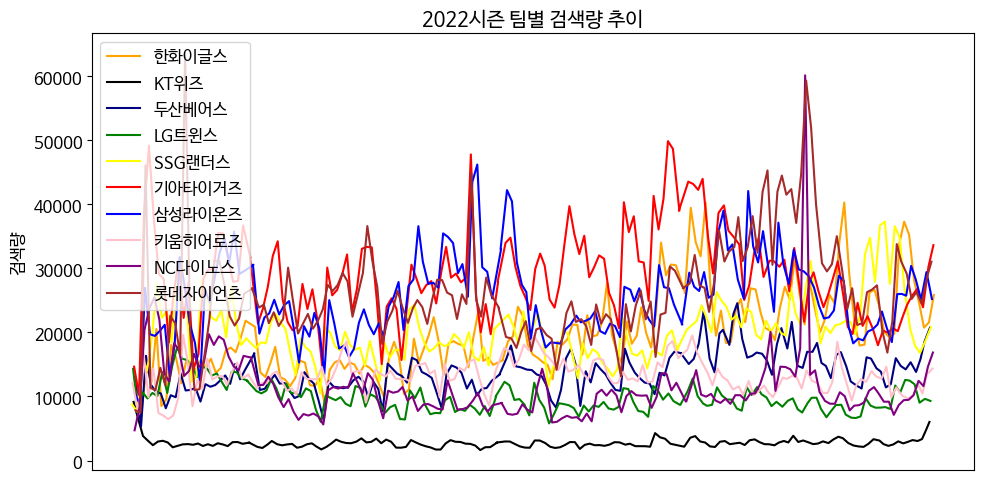

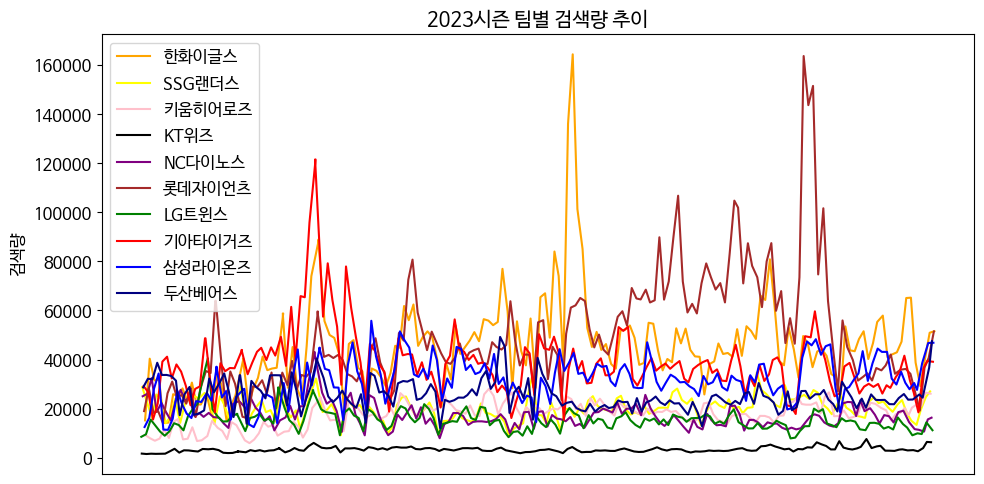

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

colors = {'KT위즈':'black', 'NC다이노스':'purple', '두산베어스':'navy', 'SSG랜더스':'yellow',
          'LG트윈스':'green', '키움히어로즈':'pink', '한화이글스' : 'orange',
          '기아타이거즈':'red', '롯데자이언츠':'brown', '삼성라이온즈':'blue'}

# 2022년도
mask = df['date'] < '2023-01-01'
df_2022 = df.loc[mask]
df_2022 = df_2022.sort_values(by='date')

fig, ax = plt.subplots(figsize=(10, 5))

for i, team in enumerate(df_2022['team'].unique()):
    team_df = df_2022[df_2022['team']==team]
    ax.plot(team_df['sum_value'], color=colors[team], label=team)

ax.legend(loc='upper left', fontsize=12)
ax.set_title('2022시즌 팀별 검색량 추이')

ax.axes.xaxis.set_visible(False)
ax.set_ylabel('검색량')
plt.tight_layout()
plt.show()

# 2023년도
mask = df['date'] >= '2023-01-01'
df_2023 = df.loc[mask]
df_2023 = df_2023.sort_values(by='date')

fig, ax = plt.subplots(figsize=(10, 5))

for i, team in enumerate(df_2023['team'].unique()):
    team_df = df_2023[df_2023['team']==team]
    ax.plot(team_df['sum_value'],color=colors[team], label=team)

ax.legend(loc='upper left', fontsize=12)
ax.set_title('2023시즌 팀별 검색량 추이')

ax.axes.xaxis.set_visible(False)
ax.set_ylabel('검색량')
plt.tight_layout()
plt.show()


순위와 검색량 상관관계 비교

순위와 검색량간의 상관계수는 0.11451593340953341입니다.


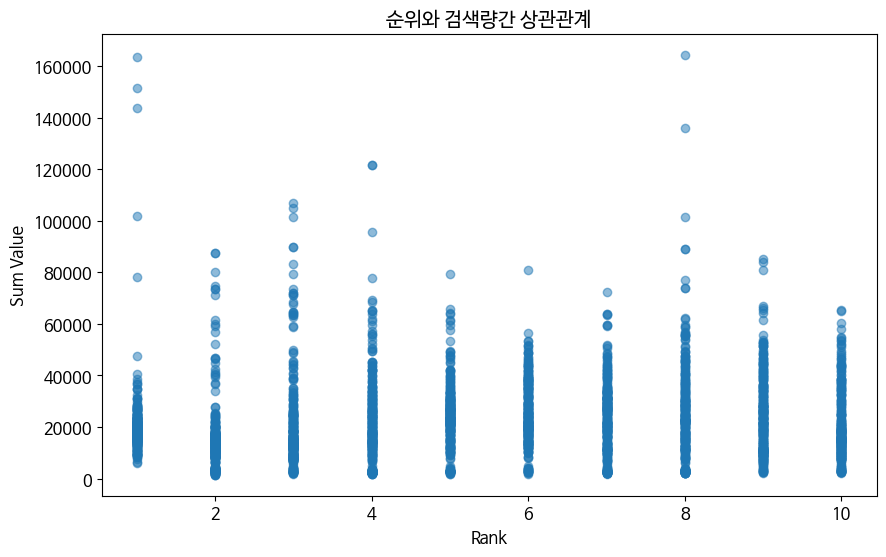

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 누락된 값 처리
data = data.dropna(subset=['rank', 'sum_value'])

# 순위와 sum_value간의 상관계수 계산
correlation = data['rank'].corr(data['sum_value'])

print(f'순위와 검색량간의 상관계수는 {correlation}입니다.')

# 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['rank'], data['sum_value'], alpha=0.5)
plt.title('순위와 검색량간 상관관계')
plt.xlabel('Rank')
plt.ylabel('Sum Value')
plt.show()


In [ ]:
from scipy.stats import spearmanr

rank_mean = df.groupby('rank')['sum_value'].mean().reset_index()

# 스피어만 상관계수 계산
corr, pval = spearmanr(rank_mean['rank'], rank_mean['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: 0.52
p-value: 0.1276


상관계수가 0.52로 어느정도 상관관계가 존재하지만 p-value값이 0.05보다 높기에 우연히 발생했을 가능성이 높다고 판단.

승률과 검색량간의 상관계수는 -0.06644551281905807입니다.


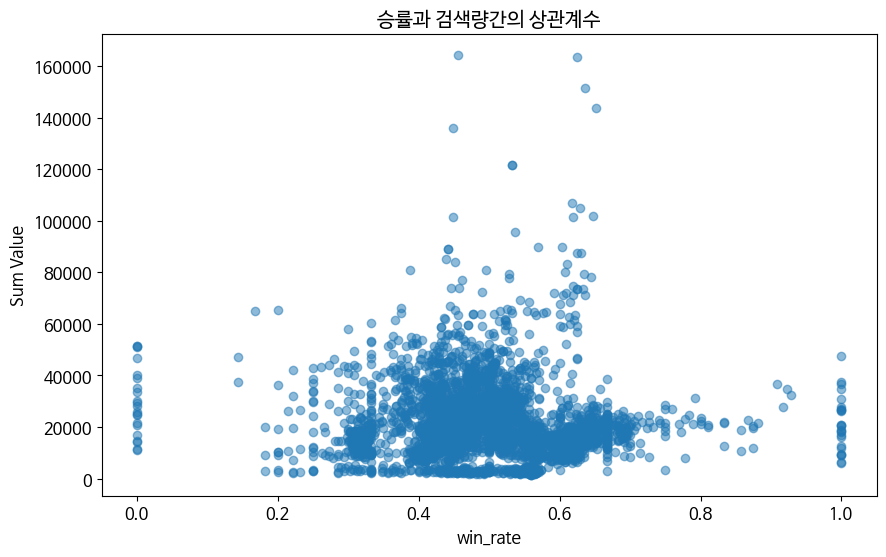

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 누락된 값 처리
data = data.dropna(subset=['win_rate', 'sum_value'])

# 순위와 sum_value간의 상관계수 계산
correlation = data['win_rate'].corr(data['sum_value'])

print(f'승률과 검색량간의 상관계수는 {correlation}입니다.')

# 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['win_rate'], data['sum_value'], alpha=0.5)
plt.title('승률과 검색량간의 상관계수')
plt.xlabel('win_rate')
plt.ylabel('Sum Value')
plt.show()


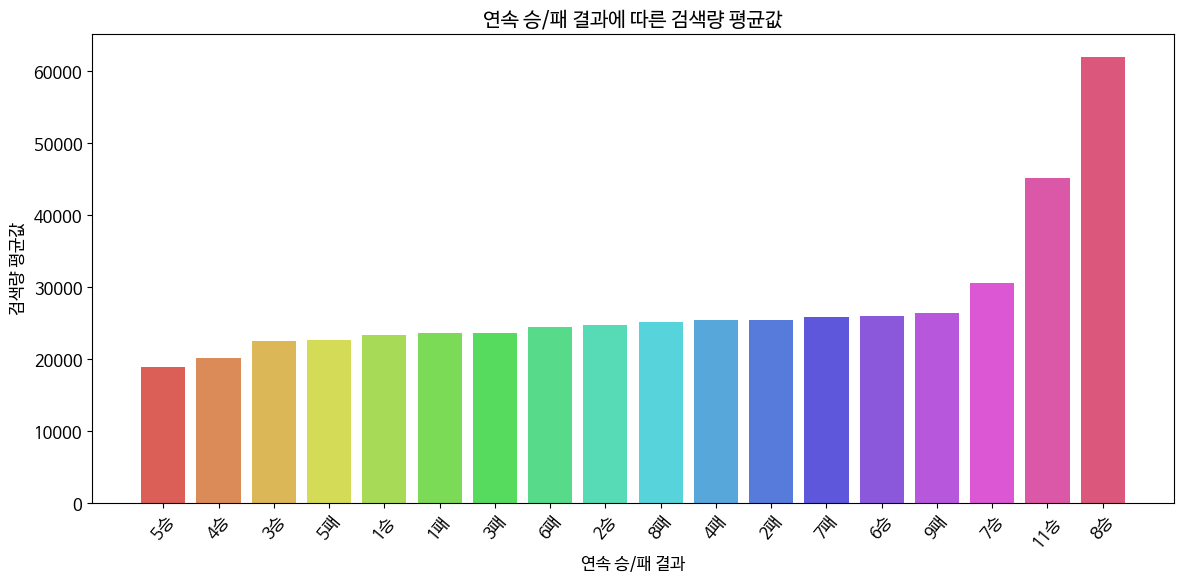

In [ ]:
# 그룹화 및 평균 계산
grouped_data = df.groupby('streak')['sum_value'].mean().reset_index()

# 정렬
sorted_data = grouped_data.sort_values(by='sum_value')

# 팔레트 불러오기
import seaborn as sns
palette = sns.color_palette("hls", len(sorted_data))

# 정렬된 데이터로 그래프 출력
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['streak'], sorted_data['sum_value'], color=palette)
plt.xlabel('연속 승/패 결과')
plt.ylabel('검색량 평균값')
plt.title('연속 승/패 결과에 따른 검색량 평균값')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

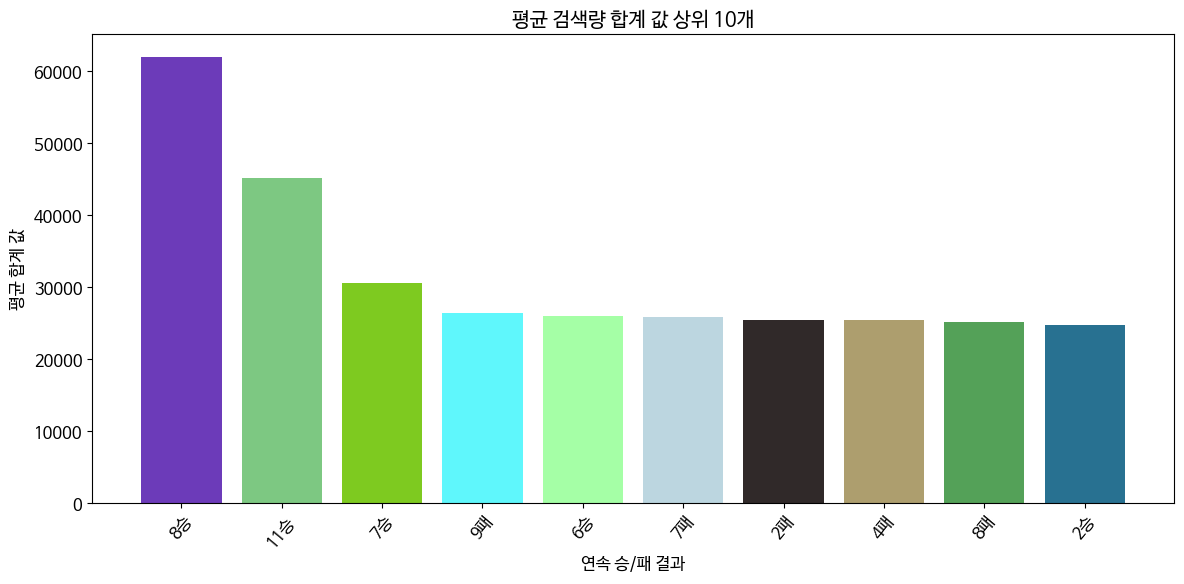

In [ ]:
# 그룹화 및 평균 계산
grouped_data = df.groupby('streak')['sum_value'].mean().reset_index()

# 평균 합계 값 기준 상위 10개 추출
top_10 = grouped_data.nlargest(10, 'sum_value')

# 정렬
sorted_data = top_10.sort_values(by='sum_value', ascending=False)

# 정렬된 데이터로 그래프 출력
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_data['streak'], sorted_data['sum_value'], color=np.random.rand(len(sorted_data), 3))
plt.xlabel('연속 승/패 결과')
plt.ylabel('평균 합계 값')
plt.title('평균 검색량 합계 값 상위 10개')
plt.xticks(rotation=50)
plt.tight_layout()

# 색상 범례 추가
color_labels = [str(bar.get_facecolor()) for bar in bars]


plt.show()

In [ ]:
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))

# 연속 값별 sum_value 평균 계산
streak_mean = data.groupby('streak')['sum_value'].mean().reset_index()

# 스피어만 상관계수 계산
corr, pval = spearmanr(streak_mean['streak'], streak_mean['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: 0.73
p-value: 0.0158


상관계수가 0.85이므로 연속 경기 수가 클수록 평균 검색량이 높아진다는 의미이며
p-value값이 0.05보다 작기에 통계적으로 유의미한 결과임

## 관중수와 검색량 상관관계 분석

In [ ]:
home_data = data[data['home_or_away'] == 'home'].dropna(subset=['attendance'])

# 스피어만 상관계수 계산
corr, pval = spearmanr(home_data['attendance'], home_data['sum_value'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

스피어만 상관계수: -0.09
p-value: 0.0011


In [ ]:
from scipy.stats import pearsonr

df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['attendance', 'sum_value'])

# 상관계수 계산
corr, p_value = pearsonr(df['attendance'], df['sum_value'])

# 결과 출력
print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

상관계수: 0.2151
p-value: 0.0000


관중수(home)과 검색량간에 상관계수는 낮음

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

# 결측치 제거
data = data.dropna(subset=['stadium'])

# 구장별 평균 검색량 계산
stadium_mean = data.groupby('stadium')['sum_value'].mean().reset_index()
print(stadium_mean)

   stadium     sum_value
0       고척  20483.253472
1       광주  28740.555556
2       대구  26922.481481
3       대전  27575.599315
4       문학  22334.571429
5       사직  29688.728571
6       수원  13490.897260
7       울산  34583.687500
8       잠실  20117.475945
9       창원  18768.403448
10      포항  30532.666667


In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/22-23KBO데이터.csv', encoding='cp949')

data = data.dropna(subset=['stadium', 'attendance'])

# attendance 열에서 쉼표 제거 및 숫자로 변환
data['attendance'] = data['attendance'].str.replace(',', '').astype(int)

# stadium 열을 범주형으로 변환
data['stadium'] = data['stadium'].astype('category')

# 구장과 검색량 간의 상관관계 분석
corr_sum, pval_sum = spearmanr(data['stadium'].cat.codes, data['sum_value'])
print(f"구장과 검색량 간의 스피어만 상관계수: {corr_sum:.2f}, p-value: {pval_sum:.4f}")

# 구장과 관중수 간의 상관관계 분석
corr_att, pval_att = spearmanr(data['stadium'].cat.codes, data['attendance'])
print(f"구장과 관중수 간의 스피어만 상관계수: {corr_att:.2f}, p-value: {pval_att:.4f}")

구장과 검색량 간의 스피어만 상관계수: -0.17, p-value: 0.0000
구장과 관중수 간의 스피어만 상관계수: 0.09, p-value: 0.0000


구장을 범주형 데이터로 변환후 구장과 검색량/관중수 간에 상관관계를 구한 결과 서로 상관관계가 낮음.

승률과 관중수 상관관계

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

df = df.dropna(subset=['new_attendance', 'win_rate'])

# 상관계수 계산
corr, p_value = pearsonr(df['new_attendance'], df['win_rate'])

# 결과 출력
print(f"승률(win_rate)과 new_attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

승률(win_rate)과 new_attendance 간의 상관계수: 0.1738
p-value: 0.0000


순위와 관중수 상관계수

In [ ]:
# 결측치 제거
df = df.dropna(subset=['new_attendance', 'rank'])

# 상관계수 계산
corr, p_value = pearsonr(df['new_attendance'], df['rank'])

# 결과 출력
print(f"순위(rank)와 new_attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

순위(rank)와 new_attendance 간의 상관계수: -0.1866
p-value: 0.0000


In [ ]:
from scipy.stats import spearmanr

home_data = df[df['home_or_away'] == 'home'].dropna(subset=['attendance'])

# 스피어만 상관계수 계산
corr, pval = pearsonr(home_data['attendance'], home_data['rank'])

print(f'스피어만 상관계수: {corr:.2f}')
print(f'p-value: {pval:.4f}')

NameError: name 'pearsonr' is not defined

연속(절댓값)과 관중수 상관관계

In [ ]:
df = pd.read_csv('/content/22-23KBO데이터최종.csv')

# 승리와 패배를 숫자로 변환하는 함수 정의 (음수 없이)
def convert_streak_absolute(streak):
    return int(''.join(filter(str.isdigit, streak)))

# new_streak 열 추가
df['new_streak'] = df['streak'].apply(convert_streak_absolute)
# 결측치 제거
df = df.dropna(subset=['attendance', 'new_streak'])

# 상관계수 계산
corr, p_value = pearsonr(df['attendance'], df['new_streak'])

# 결과 출력
print(f"연속과 attendance 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")


연속과 attendance 간의 상관계수: -0.0204
p-value: 0.4377


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('/content/kbo최종.csv')

df = df[df['day'] != '월']

# 요일을 숫자로 변환하는 함수
def convert_day_to_number(day):
    day_mapping = {'화': 2, '수': 3, '목': 4, '금': 5, '토': 6, '일': 7}
    return day_mapping.get(day, None)

# 요일을 숫자로 변환
df['day'] = df['day'].apply(convert_day_to_number)


# attendance가 null인 행 제거
df = df.dropna(subset=['attendance', 'day'])

corr, p_value = pearsonr(df['day'], df['attendance'])

# 결과 출력
print(f"요일과 관중수 간의 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

요일과 관중수 간의 상관계수: 0.4543
p-value: 0.0000


In [ ]:
df['attendance'].max()

24132.0

검색량과 관중 비율간 상관관계

sum_value와 attendance_ratio의 상관계수: 0.2805627118856344


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

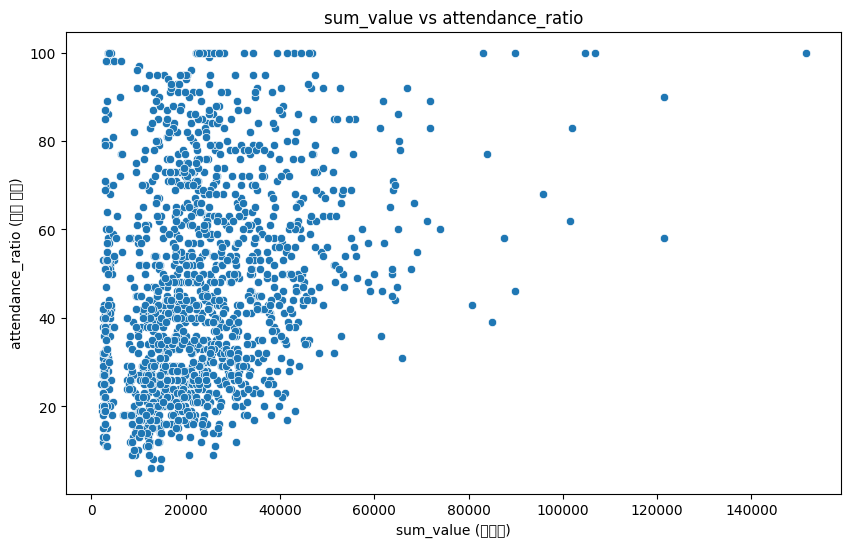


팀별 평균:
           sum_value  attendance_ratio
team                                  
롯데자이언츠  41374.337838         47.364865
기아타이거즈  36542.437500         44.930556
한화이글스   35055.712329         48.931507
삼성라이온즈  31778.409722         45.743056
SSG랜더스  22353.081633         61.163265
두산베어스   21569.178082         44.698630
키움히어로즈  17242.166667         40.618056
NC다이노스  16323.703448         36.193103
LG트윈스   13280.613793         59.434483
KT위즈     3453.267123         44.308219

팀별 상관계수:
team
NC다이노스    0.649957
롯데자이언츠    0.596713
키움히어로즈    0.552102
한화이글스     0.547714
LG트윈스     0.495447
SSG랜더스    0.478014
두산베어스     0.474153
삼성라이온즈    0.440863
기아타이거즈    0.414976
KT위즈      0.394094
dtype: float64


<ipython-input-8-4e88ebd20e70>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_corr = df.groupby('team').apply(lambda x: x['sum_value'].corr(x['attendance_ratio'])).sort_values(ascending=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (CSV 파일로 저장되어 있다고 가정)
df = pd.read_csv('/content/kbo최종.csv')

# 필요한 컬럼만 선택
df = df[['date', 'team', 'sum_value', 'attendance_ratio']]

# 결측치 제거
df = df.dropna(subset=['sum_value', 'attendance_ratio'])

# 상관계수 계산
correlation = df['sum_value'].corr(df['attendance_ratio'])

print(f"sum_value와 attendance_ratio의 상관계수: {correlation}")

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_value', y='attendance_ratio', data=df)
plt.title('sum_value vs attendance_ratio')
plt.xlabel('sum_value (검색량)')
plt.ylabel('attendance_ratio (관중 비율)')
plt.show()

# 팀별 평균 계산
team_avg = df.groupby('team')[['sum_value', 'attendance_ratio']].mean().sort_values('sum_value', ascending=False)
print("\n팀별 평균:")
print(team_avg)

# 팀별 상관계수 계산
team_corr = df.groupby('team').apply(lambda x: x['sum_value'].corr(x['attendance_ratio'])).sort_values(ascending=False)
print("\n팀별 상관계수:")
print(team_corr)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('kbo최종.csv')

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'new_streak', 'attendance_ratio', 'home_or_away', 'day']
X = df[features]
y = df['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 특성 중요도 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

Mean Squared Error: 183058470.84174597
R-squared Score: 0.2016947607161803
              feature  importance
1            win_rate    0.368365
2          new_streak    0.179490
3    attendance_ratio    0.168917
0                rank    0.118574
11              day_토    0.027173
10              day_일    0.023752
12              day_화    0.022311
6               day_금    0.022219
7               day_목    0.022006
8               day_수    0.020865
4   home_or_away_away    0.018514
5   home_or_away_home    0.004808
9               day_월    0.003007


Mean Squared Error: 202415482.98055944
R-squared Score: 0.11728017920984712
            feature  importance
1          win_rate    0.447900
3  attendance_ratio    0.220414
2            streak    0.160985
0              rank    0.133350
4             day_토    0.037350


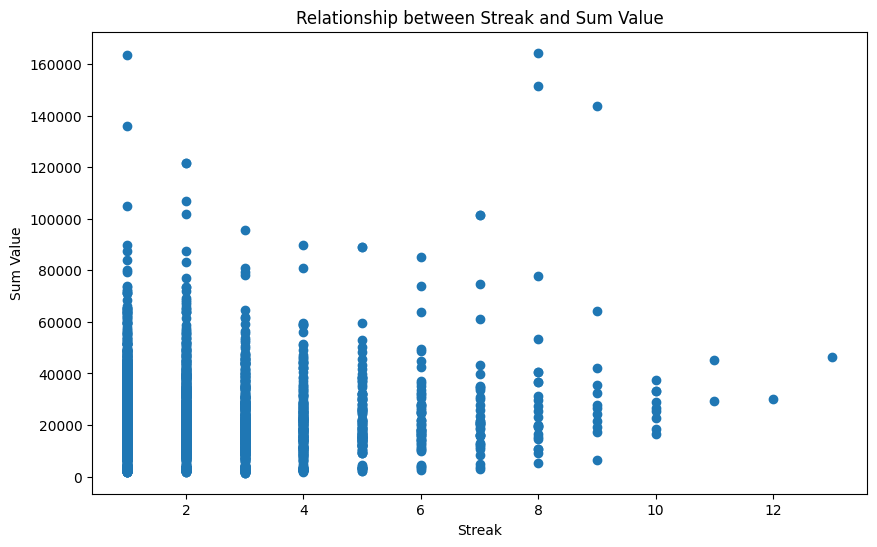

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# 데이터 로드 (여기서는 'data'가 이미 로드되어 있다고 가정)
data = pd.read_csv('kbo최종.csv')

# streak 전처리
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'streak', 'attendance_ratio', 'home_or_away', 'day']
X = data[features]
y = data['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 특성 선택 (RFE)
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rfe, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 선택된 특성 및 중요도 확인
selected_features = X.columns[rfe.support_]
feature_importance = pd.DataFrame({'feature': selected_features, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

# streak와 sum_value의 관계 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['streak'], data['sum_value'])
plt.xlabel('Streak')
plt.ylabel('Sum Value')
plt.title('Relationship between Streak and Sum Value')
plt.show()

Mean Squared Error: 24830167.57551504
R-squared Score: 0.8917173743247986
              feature  importance
10     rolling_search    0.589238
11  home_or_away_away    0.075176
0                rank    0.055792
7    attendance_ratio    0.034951
9         day_of_week    0.034649
6          attendance    0.027961
8               month    0.026217
19              day_화    0.022234
18              day_토    0.020711
16              day_월    0.020370


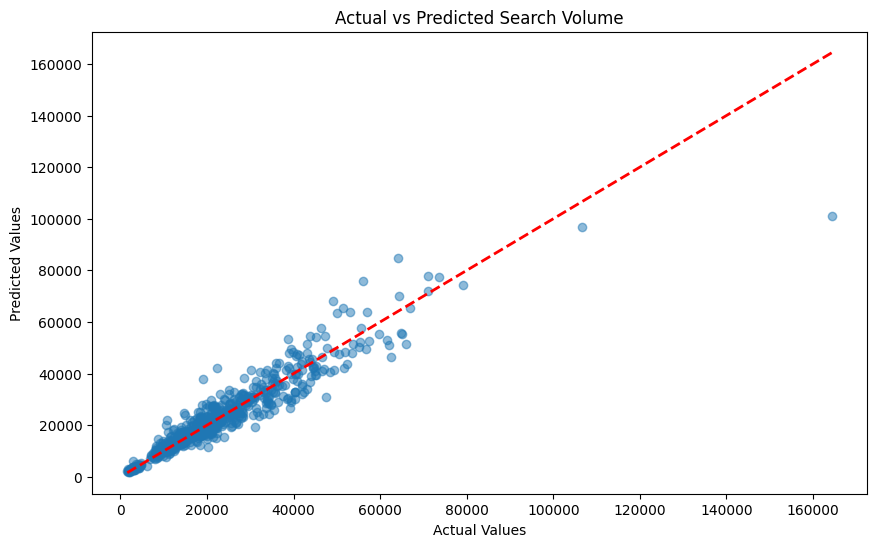

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE

# 데이터 로드 (여기서는 'data'가 이미 로드되어 있다고 가정)
data = pd.read_csv('kbo최종.csv')

# 데이터 전처리
data['streak'] = data['streak'].apply(lambda x: int(str(x).replace('승', '').replace('패', '')))
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# 특성 엔지니어링
data['win_streak'] = np.where(data['streak'] > 0, data['streak'], 0)
data['lose_streak'] = np.where(data['streak'] < 0, -data['streak'], 0)
data['win_rate_streak'] = data['win_rate'] * data['streak']

# 이동 평균 특성 추가 (예: 최근 7일 평균 검색량)
data['rolling_search'] = data.groupby('team')['sum_value'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

# 특성(X)과 타겟(y) 설정
features = ['rank', 'win_rate', 'streak', 'win_streak', 'lose_streak', 'win_rate_streak',
            'attendance', 'attendance_ratio', 'month', 'day_of_week', 'rolling_search',
            'home_or_away', 'day']
X = data[features]
y = data['sum_value']

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['home_or_away', 'day'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 학습
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# 특성 중요도 확인
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head(10))

# 실제값과 예측값 비교 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Search Volume')
plt.show()